<a href="https://colab.research.google.com/github/geonextgis/End-to-End-Machine-Learning/blob/main/03_Machine_Learning_Algorithms%20/05_Decision_Tree/02_Decision_Tree_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Visualization using Dtreeviz**

## **Import Required Libraries**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install graphviz==0.14.1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import plot_tree
import dtreeviz

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

import warnings
warnings.filterwarnings("ignore")

## **Classification**

### **Read the Data**

In [4]:
# Load the Iris dataset
iris_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/Iris.csv")
print(iris_df.shape)
iris_df.head()

(150, 6)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [5]:
# Check the data information
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### **Data Preprocessing**

In [6]:
# Encode the target values in integer
label_encoder = LabelEncoder()

# Fit the target column
label_encoder.fit(iris_df["Species"])

# Transorm the data
iris_df["Species"] = label_encoder.transform(iris_df["Species"])
print(iris_df.shape)
iris_df.head()

(150, 6)


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [7]:
# Check the classes in the label encoder
print(label_encoder.classes_)

iris_df["Species"].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Species
0    50
1    50
2    50
Name: count, dtype: int64

### **Train Test Split**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, 1:-1],
                                                    iris_df.iloc[:, -1],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((105, 4), (45, 4))

### **Train a DecisionTreeClassifier**

In [9]:
# Instantiate a decision tree classifier object
dtc = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=2,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=42)

# Fit the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### **Accuracy Assessment**

In [10]:
# Predict the test data
y_pred = dtc.predict(X_test)

# Calculate the R2 Score
print("Overall Accuracy:", accuracy_score(y_test, y_pred).round(2))

Overall Accuracy: 0.98


### **Plot the Tree**

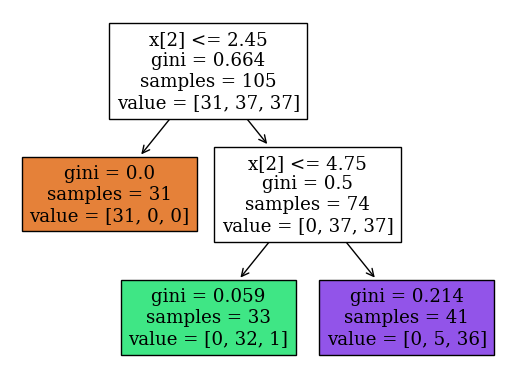

In [11]:
# Plot the tree using sklearn 'plot_tree' function
plot_tree(dtc, filled=True);

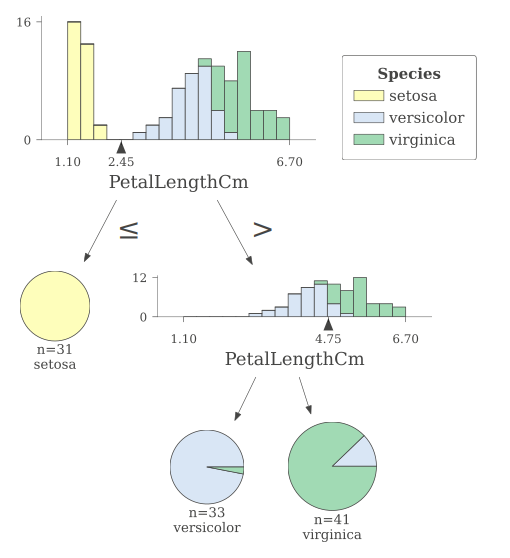

In [12]:
# Plot the tree using dtreeviz
viz = dtreeviz.model(model=dtc,
                     X_train=X_train,
                     y_train=y_train,
                     feature_names=X_train.columns,
                     target_name="Species",
                     class_names=["setosa", "versicolor", "virginica"])

viz.view(fontname="DejaVu Serif", scale=2)

## **Regression**

### **Read the Data**

In [13]:
# Load the Iris dataset
housing_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/housing.csv")
print(housing_df.shape)
housing_df.head()

(20640, 10)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [14]:
# Check the data information
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### **Data Preprocessing**

In [15]:
# Apply one hot encoding on 'ocean_proximity' column
housing_df = pd.get_dummies(housing_df, columns=["ocean_proximity"], drop_first=True)
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False

In [16]:
# Drop the rows with null values
housing_df.dropna(inplace=True)
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   False                      True   
1                   False                   False                      True   
2                   False                   False                      True   
3                   False                   False                      True   
4                   False                   False                      True   

   ocean_proximity_NEAR OCEAN  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False

### **Train Test Split**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(housing_df.drop(columns=["median_house_value"]),
                                                    housing_df["median_house_value"],
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((14303, 12), (6130, 12))

### **Train a Decision Tree Regressor**

In [27]:
# Instantiate a decision tree regressor object
dtr = DecisionTreeRegressor(criterion='squared_error',
                            splitter='best',
                            max_depth=2,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

# Fit the training data
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

### **Accuracy Assessment**

In [28]:
# Predict the test data
y_pred = dtr.predict(X_test)

# Calculate the R2 Score
print("R2 Score:", r2_score(y_test, y_pred).round(2))

R2 Score: 0.49


### **Plot the Tree**

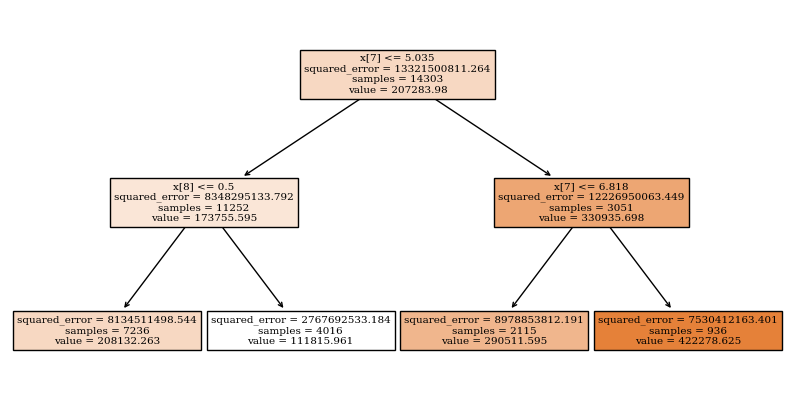

In [31]:
# Plot the tree using sklearn 'plot_tree' function
plt.figure(figsize=(10, 5), dpi=100)
plot_tree(dtr, filled=True);

In [39]:
# Plot the tree using dtreeviz
viz = dtreeviz.model(model=dtr,
                     X_train=X_train,
                     y_train=y_train,
                     feature_names=X_train.columns,
                     target_name="median_house_value")

viz.view(fontname="DejaVu Serif", scale=2)